In [68]:
import scipy
import scipy as sp
import numpy as np
import matplotlib.pyplot as plt
import wave
from scipy.io import wavfile
from scipy import signal
import sounddevice as sd
from signal_processor import SignalProcessor

In [69]:

audio = '03-laufey-from-the-start.wav'
processor = SignalProcessor(audio)
processor.sample_rate, processor.audio_data = processor.get_sampling_rate(audio)
processor.mono_stereo()
processor.normalize_audio()

Sampling Rate of Original WAV file: 48000 Hz
Coverted from Stereo to Mono
Audio Normalized


In [70]:

low_frequency = 100
high_frequency = 8000
num_bands = 10

log_freqs = np.logspace(np.log10(low_frequency), np.log10(high_frequency), num_bands + 1)
filter_bank = []

for i in range(num_bands):
    filter_bank.append(processor.create_bandpass(log_freqs[i], log_freqs[i+1], 8))


In [71]:

from scipy.signal import sosfiltfilt
# Apply each bandpass filter to the audio signal
filtered_signals = []
for sos in filter_bank:
    filtered_signal = sosfiltfilt(sos, processor.audio_data)
    filtered_signals.append(filtered_signal)

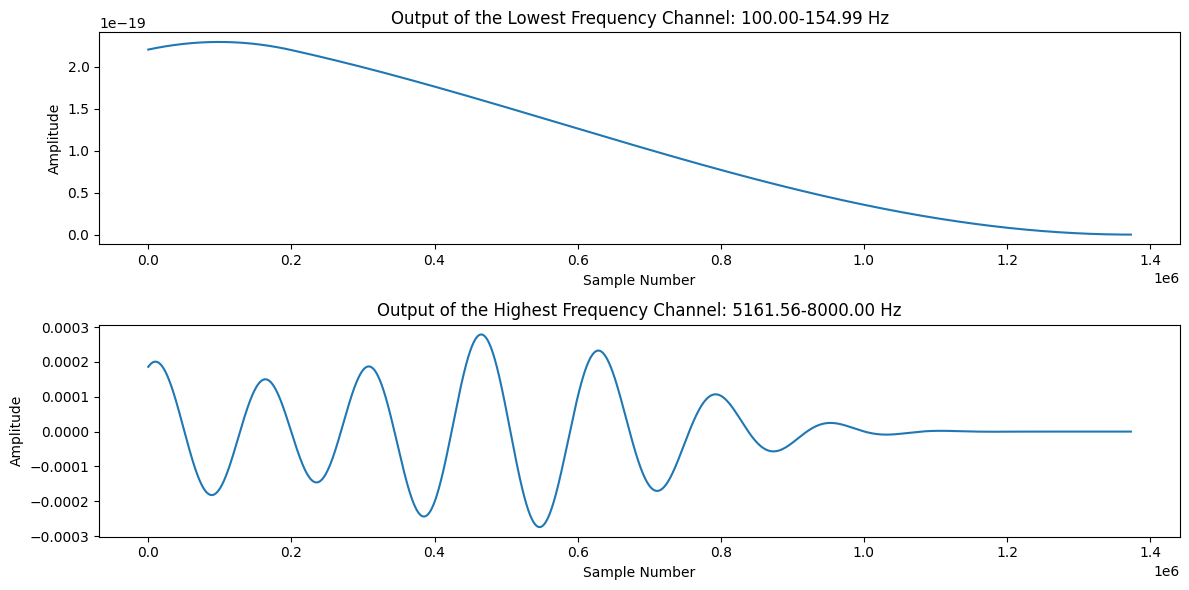

In [72]:

import matplotlib.pyplot as plt

# Plot the output signal of the lowest frequency channel
plt.figure(figsize=(12, 6))

plt.subplot(2, 1, 1)  # 2 rows, 1 column, 1st subplot
plt.plot(filtered_signals[0])
plt.title(f'Output of the Lowest Frequency Channel: {log_freqs[0]:.2f}-{log_freqs[1]:.2f} Hz')
plt.xlabel('Sample Number')
plt.ylabel('Amplitude')

# Plot the output signal of the highest frequency channel
plt.subplot(2, 1, 2)  # 2 rows, 1 column, 2nd subplot
plt.plot(filtered_signals[-1])
plt.title(f'Output of the Highest Frequency Channel: {log_freqs[-2]:.2f}-{log_freqs[-1]:.2f} Hz')
plt.xlabel('Sample Number')
plt.ylabel('Amplitude')

plt.tight_layout()
plt.show()